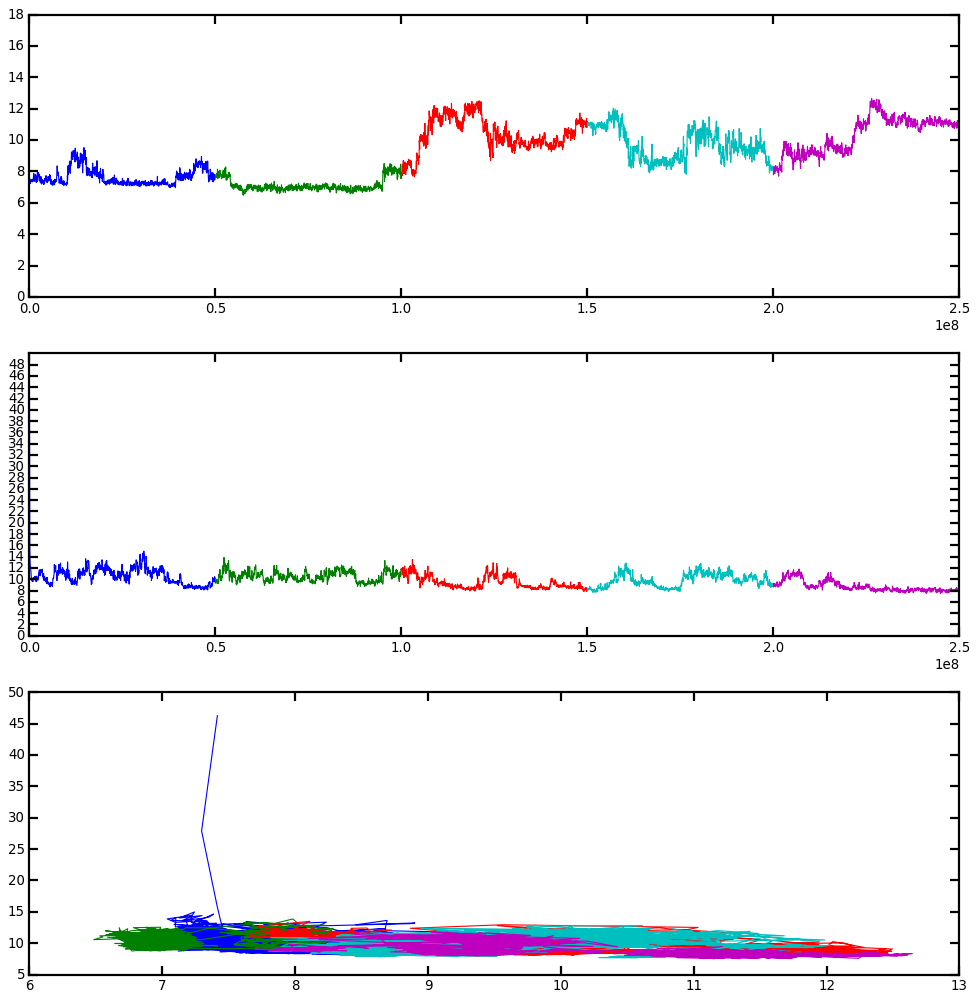

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2

data1=pd.read_csv("nvt1.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data1 = data1.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data2=pd.read_csv("nvt2.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data2 = data2.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data3=pd.read_csv("nvt3.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data3 = data3.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data4=pd.read_csv("nvt4.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data4 = data4.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data5=pd.read_csv("nvt5.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data5 = data5.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

plt.figure(figsize=(15,15),facecolor='white')
plt.subplot(3,1,1)
plt.plot(np.array(data1.iloc[:,0]),np.array(data1.iloc[:,1]))
plt.plot(np.array(data2.iloc[:,0]),np.array(data2.iloc[:,1]))
plt.plot(np.array(data3.iloc[:,0])+50000000,np.array(data3.iloc[:,1]))
plt.plot(np.array(data4.iloc[:,0])+50000000+50000000,np.array(data4.iloc[:,1]))
plt.plot(np.array(data5.iloc[:,0])+50000000+50000000+50000000,np.array(data5.iloc[:,1]))
plt.yticks(np.arange(0,20,2))
plt.subplot(3,1,2)
plt.plot(np.array(data1.iloc[:,0]),np.array(data1.iloc[:,2]))
plt.plot(np.array(data2.iloc[:,0]),np.array(data2.iloc[:,2]))
plt.plot(np.array(data3.iloc[:,0])+50000000,np.array(data3.iloc[:,2]))
plt.plot(np.array(data4.iloc[:,0])+50000000+50000000,np.array(data4.iloc[:,2]))
plt.plot(np.array(data5.iloc[:,0])+50000000+50000000+50000000,np.array(data5.iloc[:,2]))
plt.yticks(np.arange(0,50,2))
plt.subplot(3,1,3)
plt.plot(np.array(data1.iloc[:,1]),np.array(data1.iloc[:,2]))
plt.plot(np.array(data2.iloc[:,1]),np.array(data2.iloc[:,2]))
plt.plot(np.array(data3.iloc[:,1]),np.array(data3.iloc[:,2]))
plt.plot(np.array(data4.iloc[:,1]),np.array(data4.iloc[:,2]))
plt.plot(np.array(data5.iloc[:,1]),np.array(data5.iloc[:,2]))
plt.show()

In [3]:
data1=pd.read_csv("nvt1.colvars.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
data1

,0,1,2,3
0,0,7.414649,46.261973,NaN
1,50000,7.295800,27.883631,NaN
2,100000,7.413569,15.832389,NaN
3,150000,7.439986,13.460979,NaN
4,200000,7.453002,12.622945,NaN
...,...,...,...,...
996,49800000,7.446910,10.131292,NaN
997,49850000,7.586695,10.290601,NaN
998,49900000,7.627325,9.524864,NaN
999,49950000,7.697836,9.838246,NaN


In [1]:
pwd

'C:\\Users\\Lenovo\\Desktop\\jupyter\\metadynamics\\ananta\\one'

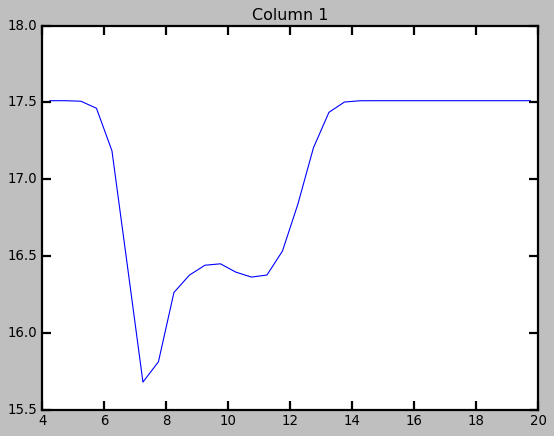

In [5]:
data_pmf=pd.read_csv("nvt5.100000000.pmf",skipinitialspace=True,delimiter=" ", comment='#',header=None)
data_pmf.columns =['column1','column2','column3']

col1_values=data_pmf.loc[:,'column1'].unique()
average_with_col1=[]
for value in col1_values:
    average_with_col1.append(np.mean(data_pmf.loc[(data_pmf['column1'] == value) , "column3"].values[:]))
    #print(value)
    #print(data_pmf.loc[(data_pmf['column1'] == value) , "column3"].values[:])
    
plt.plot(col1_values,average_with_col1)
plt.title("Column 1")
plt.show()
#print(col1_values)

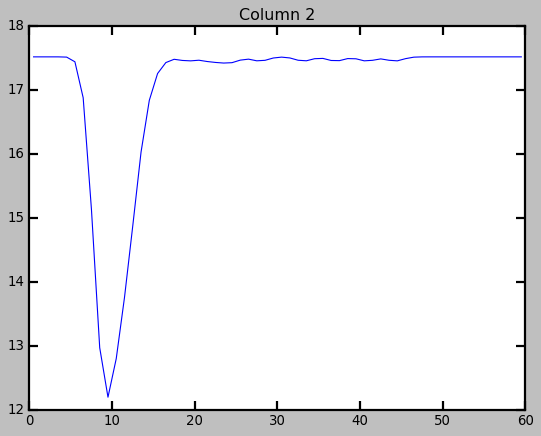

In [6]:
col2_values=data_pmf.loc[:,'column2'].unique()
average_with_col2=[]
for value in col2_values:
    #print(f'{value} {data_pmf.loc[(data_pmf["column2"] == value) , "column3"].values[:]}')
    average_with_col2.append(np.mean(data_pmf.loc[(data_pmf['column2'] == value) , "column3"].values[:]))
    
plt.plot(col2_values,average_with_col2)
plt.title("Column 2")
plt.show()
#print(col2_values)

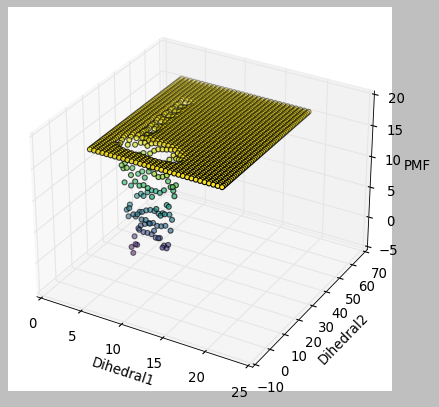

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_pmf.iloc[:,0], data_pmf.iloc[:,1], data_pmf.iloc[:,2], c=data_pmf.iloc[:,2], cmap='viridis')

# Set labels and title
ax.set_xlabel('Dihedral1')
ax.set_ylabel('Dihedral2')
ax.set_zlabel('PMF')


# Rotate the plot for better visualization if needed
#ax.view_init(30, 45)

# Show the plot
plt.show()

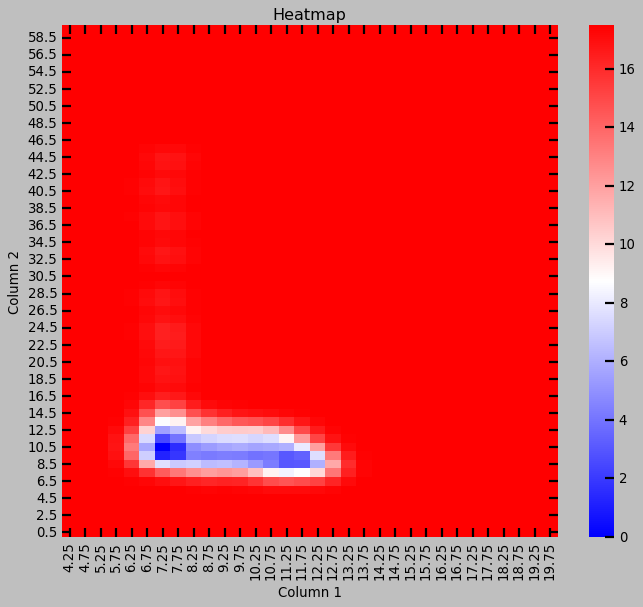

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_pmf.columns =['column1','column2','column3']
pivot_df = data_pmf.pivot(index='column2', columns='column1', values='column3')

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
ax=sns.heatmap(pivot_df, annot=False, cmap='bwr')
ax.invert_yaxis()
# Set labels and title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Heatmap')
plt.show()

In [9]:
pwd

'C:\\Users\\Lenovo\\Desktop\\jupyter\\metadynamics\\ananta\\one'

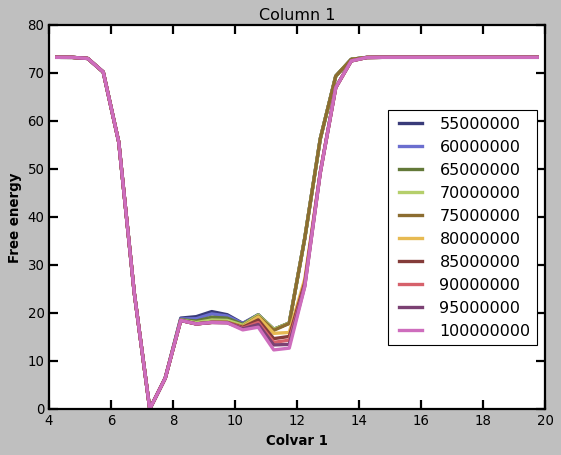

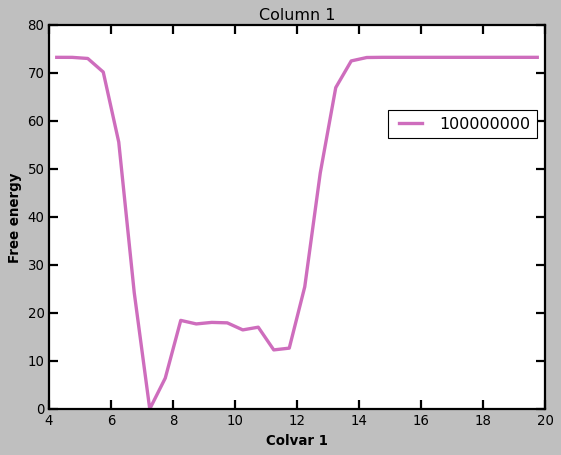

In [13]:
#Check the convergence
import matplotlib.cm as cm
times=np.arange(55000000,105000000,5000000)
colormap=cm.tab20b
num_data=len(times)
i=0
for time in times:
    data_pmf=pd.read_csv("nvt5."+str(time)+".pmf",skipinitialspace=True,delimiter=" ", comment='#',header=None)
    data_pmf.columns =['column1','column2','column3']
    col1_values=data_pmf.loc[:,'column1'].unique()
    average_with_col1=[]
    for value in col1_values:
        average_with_col1.append(np.min(data_pmf.loc[(data_pmf['column1'] == value) , "column3"].values[:])*4.184)
        #print(value)
        #print(data_pmf.loc[(data_pmf['column1'] == value) , "column3"].values[:])
    color=colormap(i/num_data)
    plt.plot(col1_values,average_with_col1, label=time, color=color, linewidth=3)
    i+=1
plt.title("Column 1")
plt.xlabel("Colvar 1", fontweight='bold')
plt.ylabel("Free energy", fontweight='bold')
plt.legend(loc='best',bbox_to_anchor=(1,0.8))
plt.savefig("colvar1_convergence.png")
plt.show()

#Plotting last frame
plt.plot(col1_values,average_with_col1, label=time, color=color, linewidth=3)
plt.title("Column 1")
plt.xlabel("Colvar 1", fontweight='bold')
plt.ylabel("Free energy", fontweight='bold')
plt.legend(loc='best',bbox_to_anchor=(1,0.8))

plt.show()


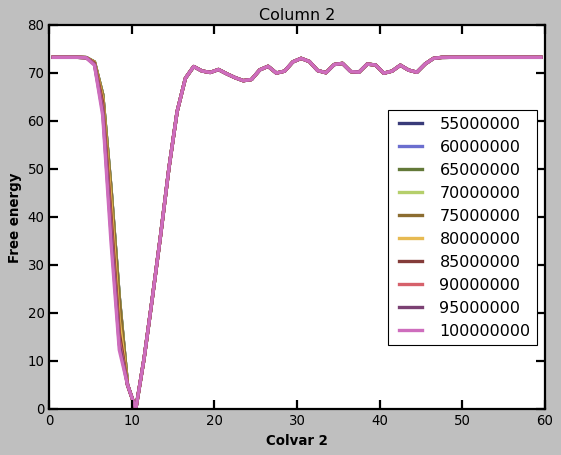

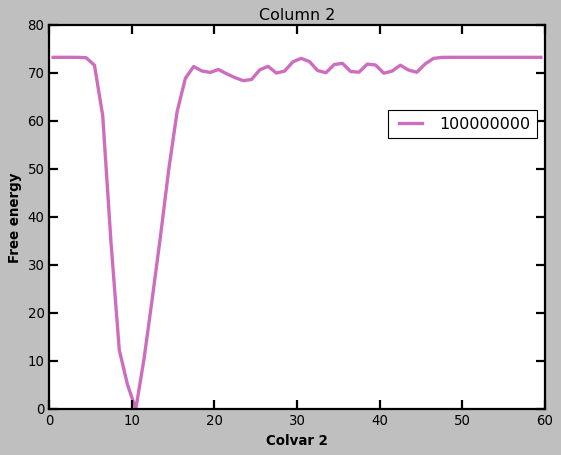

In [14]:
import matplotlib.cm as cm
times=np.arange(55000000,105000000,5000000)
colormap=cm.tab20b
num_data=len(times)
i=0
for time in times:
    data_pmf=pd.read_csv("nvt5."+str(time)+".pmf",skipinitialspace=True,delimiter=" ", comment='#',header=None)
    data_pmf.columns =['column1','column2','column3']
    col1_values=data_pmf.loc[:,'column2'].unique()
    average_with_col1=[]
    for value in col1_values:
        average_with_col1.append((np.min(data_pmf.loc[(data_pmf['column2'] == value) , "column3"].values[:]))*4.184)
        #print(value)
        #print(data_pmf.loc[(data_pmf['column1'] == value) , "column3"].values[:])
    color=colormap(i/num_data)
    plt.plot(col1_values,average_with_col1, label=time, color=color, linewidth=3)
    i+=1
plt.title("Column 2")
plt.xlabel("Colvar 2", fontweight='bold')
plt.ylabel("Free energy", fontweight='bold')
plt.legend(loc='best',bbox_to_anchor=(1,0.8))
plt.savefig("cilvar2_convergence.png")
plt.show()

#Plotting last frame
plt.plot(col1_values,average_with_col1, label=time, color=color, linewidth=3)
plt.title("Column 2")
plt.xlabel("Colvar 2", fontweight='bold')
plt.ylabel("Free energy", fontweight='bold')
plt.legend(loc='best',bbox_to_anchor=(1,0.8))
plt.show()
#print(col1_values)

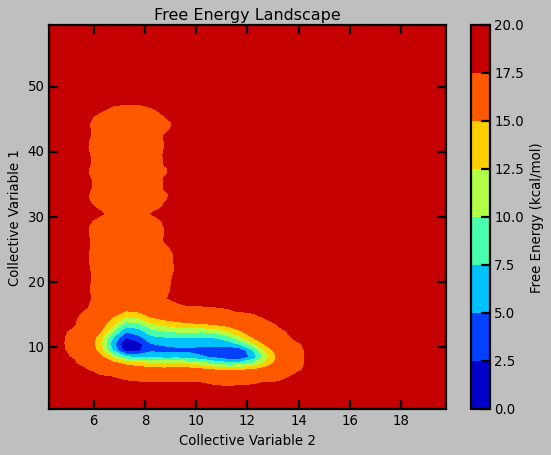

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Extract data from the metadynamics output file
# Load data from the file
data = np.loadtxt("nvt5."+str(time)+".pmf")
# Extract the first two columns as colvars
colvar1 = data[:, 0]
colvar2 = data[:, 1]
free_energy = data[:, 2]
# Sort the data based on colvar1 and colvar2
sorted_indices = np.lexsort((colvar2, colvar1))
colvar1 = np.array(colvar1)[sorted_indices]
colvar2 = np.array(colvar2)[sorted_indices]
free_energy = np.array(free_energy)[sorted_indices]

# Create 2D grid and reshape free energy values
n_colvar1 = len(set(colvar1))
n_colvar2 = len(set(colvar2))
colvar1_grid = colvar1.reshape((n_colvar1, n_colvar2))
colvar2_grid = colvar2.reshape((n_colvar1, n_colvar2))
free_energy_grid = free_energy.reshape((n_colvar1, n_colvar2))

# Optionally, you can apply some smoothing to the free energy surface
# You can use interpolation or Gaussian filtering from SciPy for this purpose.

# Plot the free energy landscape as a heatmap or contour plot
plt.figure(figsize=(8, 6))
plt.contourf( colvar1_grid ,colvar2_grid,free_energy_grid, cmap='jet')
plt.colorbar(label='Free Energy (kcal/mol)')
plt.xlabel('Collective Variable 2')
plt.ylabel('Collective Variable 1')
plt.title('Free Energy Landscape')
#plt.xlim(6,20)
#plt.ylim(5,14)
plt.savefig("heatmap.png")
plt.show()


In [14]:
pwd

'C:\\Users\\Lenovo\\Desktop\\jupyter\\metadynamics\\ananta\\one'

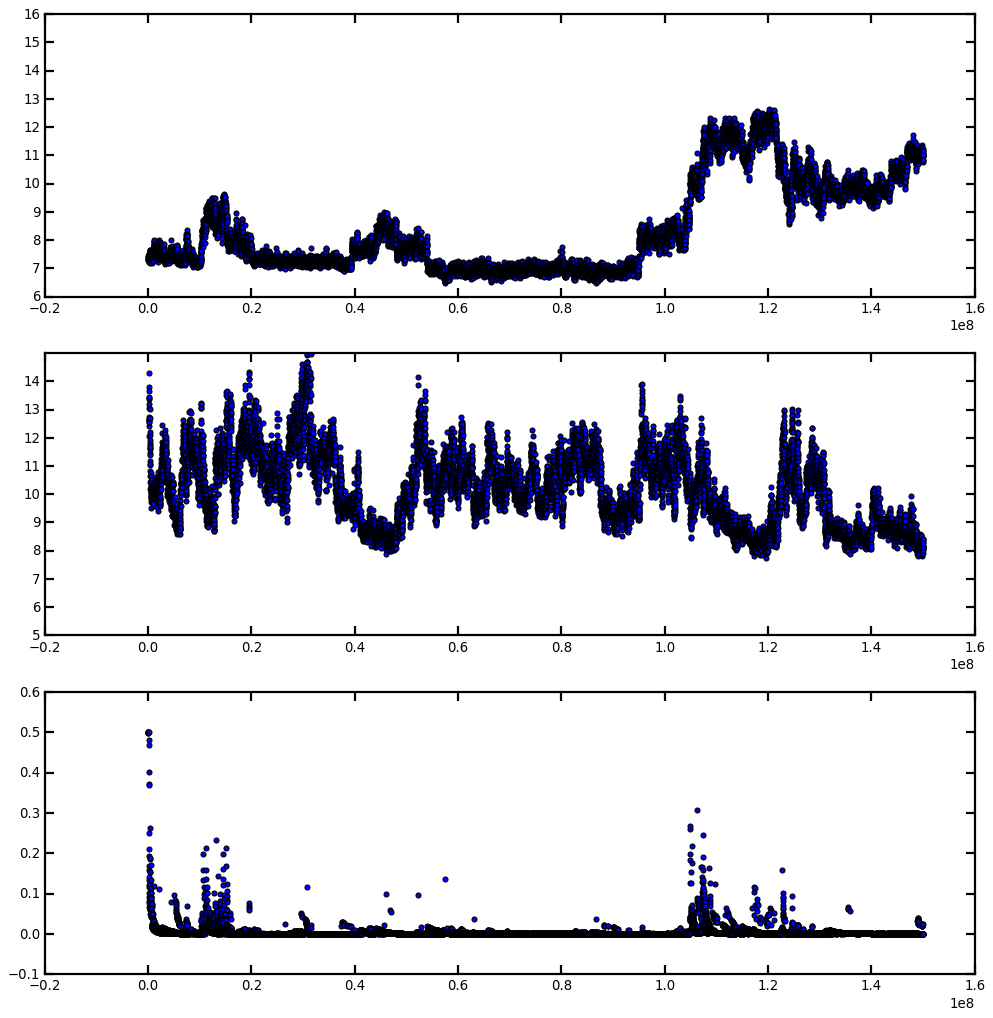

In [16]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2

data1=pd.read_csv("nvt1.colvars.metadynamics.hills.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data1 = data1.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data2=pd.read_csv("nvt2.colvars.metadynamics.hills.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data2 = data2.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

data3=pd.read_csv("nvt3.colvars.metadynamics.hills.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data3 = data3.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

plt.figure(figsize=(15,15),facecolor='white')
plt.subplot(3,1,1)
plt.scatter(np.array(data1.iloc[:,0]),np.array(data1.iloc[:,1]))
plt.scatter(np.array(data2.iloc[:,0]),np.array(data2.iloc[:,1]))
plt.scatter(np.array(data3.iloc[:,0])+50000000,np.array(data3.iloc[:,1]))
plt.yticks(np.arange(6,17,1))
plt.ylim(6,16)
plt.subplot(3,1,2)
plt.scatter(np.array(data1.iloc[:,0]),np.array(data1.iloc[:,2]))
plt.scatter(np.array(data2.iloc[:,0]),np.array(data2.iloc[:,2]))
plt.scatter(np.array(data3.iloc[:,0])+50000000,np.array(data3.iloc[:,2]))
plt.yticks(np.arange(5,15,1))
plt.ylim(5,15)
plt.subplot(3,1,3)
plt.scatter(np.array(data1.iloc[:,0]),np.array(data1.iloc[:,5]))
plt.scatter(np.array(data2.iloc[:,0]),np.array(data2.iloc[:,5]))
plt.scatter(np.array(data3.iloc[:,0])+50000000,np.array(data3.iloc[:,5]))
plt.show()

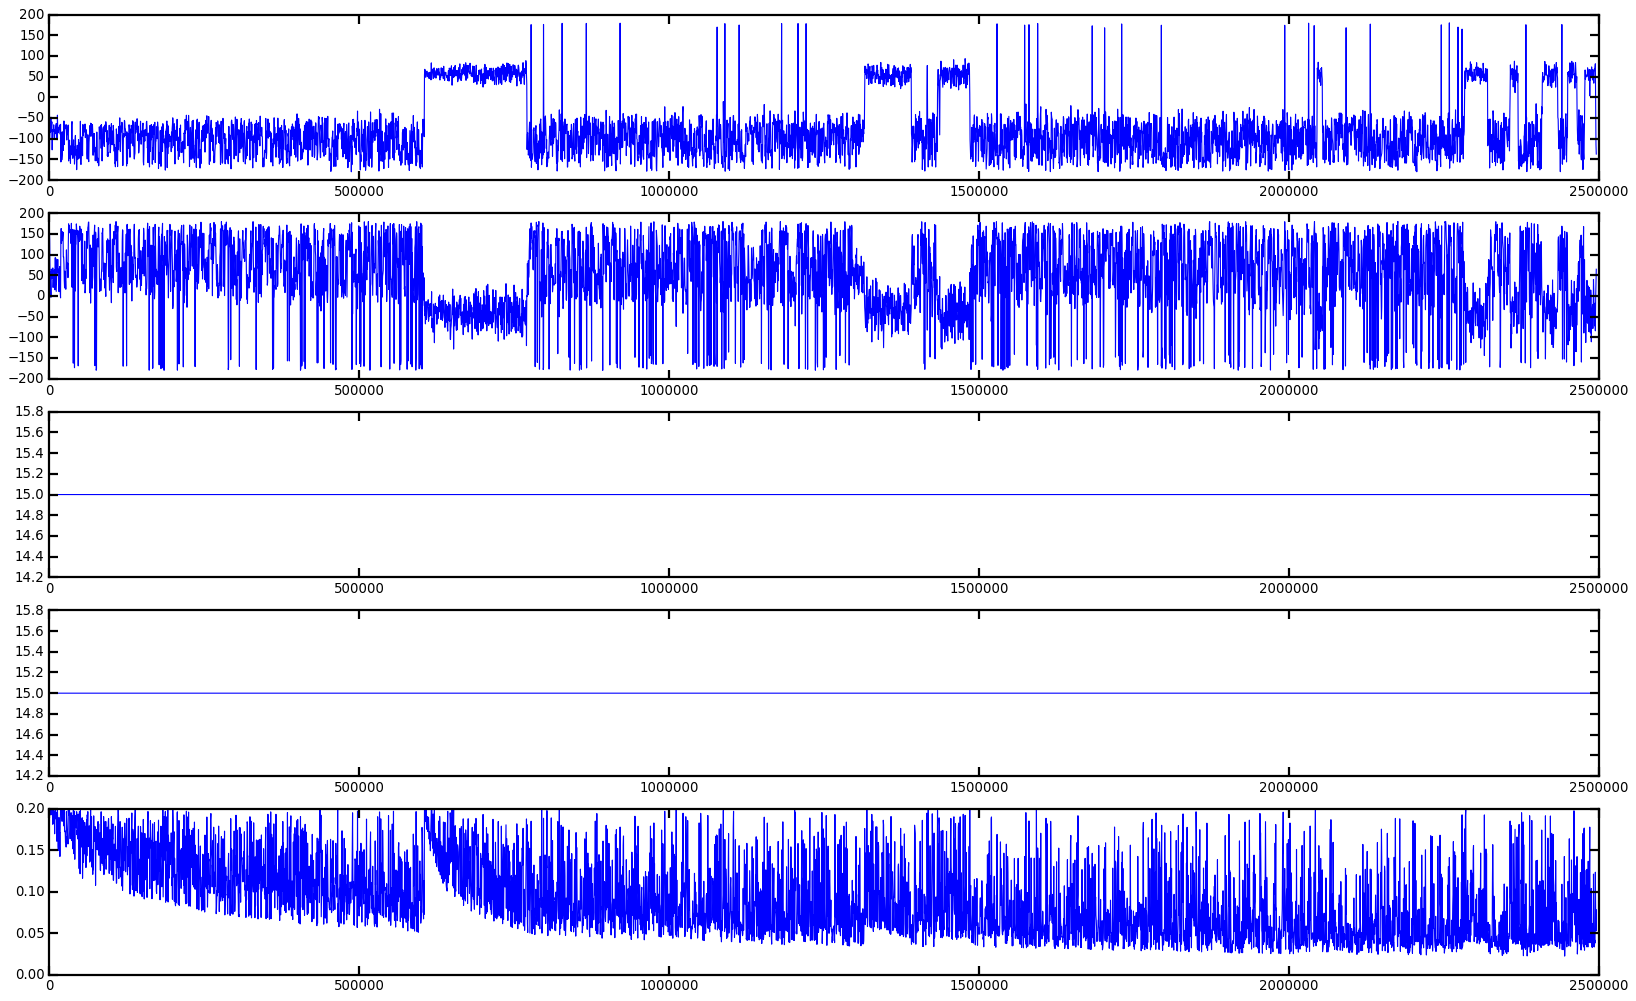

In [21]:
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['axes.linewidth']= 2

data1=pd.read_csv("test.dat",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data1 = data1.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

#data2=pd.read_csv("nvt1.colvars.metadynamics.hills.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data2 = data2.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

#data3=pd.read_csv("nvt1.colvars.metadynamics.hills.traj",skipinitialspace=True,delimiter=" ", comment='#',header=None,skiprows=lambda x: x % 1 != 0)
#data3 = data3.rename({'0': 'Step', '1': 'rgyr', '2':'separation'}, axis=1)

plt.figure(figsize=(25,15),facecolor='white')
plt.subplot(5,1,1)
plt.plot(data1.iloc[:,0],data1.iloc[:,1])

plt.subplot(5,1,2)
plt.plot(data1.iloc[:,0],data1.iloc[:,2])


plt.subplot(5,1,3)
plt.plot(data1.iloc[:,0],data1.iloc[:,3])

plt.subplot(5,1,4)
plt.plot(data1.iloc[:,0],data1.iloc[:,4])

plt.subplot(5,1,5)
plt.plot(data1.iloc[:,0],data1.iloc[:,5])

plt.show()